### 2021_10_21_8

## 새로운 특성(feature)를 선택하는 방법

* 일변량 통계(univariate statistics)
* 모델 기반 선택(model-based selection)
* 반복적 선택(iterative selection)

### 일변량 통계(F-통계량)

* 개개의 특성과 타깃(목표변수) 사이에 중요한 통계적 관계가 있는지 계산
* 분류에서는 분산분석(ANOVA)라고 한다.
* 각 특성(feature)이 독립적으로 평가.
* 계산이 매우 빠르고 평가를 위한 모델을 만들 필요가 없음.
* SelectPercentile에서 특성을 선택하는 기준은 F-값. 값이 클수록 클래스 평균의 분산이 비교적 크다.

### 분류 - f_classif, 회귀 - f_regression

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

In [13]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np

In [3]:
boston = load_boston()

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 정규화(0 ~ 1)

In [5]:
# 입력 데이터와 출력데이터를 지정해준다.
X = df_boston.loc[ : , 'CRIM':'LSTAT']
y = boston.target
print("정규화, 확장 전 데이터 셋 : ", X.shape, y.shape)

정규화, 확장 전 데이터 셋 :  (506, 13) (506,)


In [7]:
## 값을 전체적으로 0 ~ 1로 사이로 만들기 
nor_X = MinMaxScaler().fit_transform(X)
print(nor_X)
nor_X.min(), nor_X.max()

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  9.91300620e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.69701987e-01]]


(0.0, 1.0)

### 변수와 변수간의 상호작용을 통해 특징을 생성

In [8]:
ex_X = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(nor_X)
print(ex_X.shape)

(506, 104)


In [16]:
X = ex_X          # 입력
y = boston.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.5)

In [11]:
X_train.shape, X_test.shape

((253, 104), (253, 104))

### 전체 특징 다 사용

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6637958337554006

### 특징 줄여서 사용

In [26]:
X = ex_X          # 입력
y = boston.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 0,
                                                    test_size = 0.5)

### 50%의 특징 추출
select = SelectPercentile(score_func = f_regression, percentile = 50)
select.fit(X_train, y_train)

## 학습 세트에 적용
X_tr_selected = select.transform(X_train)
# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

print( "X_train.shape:", X_train.shape)
print( "X_train_selected.shape", X_tr_selected.shape)

X_train.shape: (253, 104)
X_train_selected.shape (253, 52)


* 결과를 통해 특징 개수가 104개에서 52개로 줄어든 것을 확인할 수 있다.

### 선택한 데이터 확인

[ True  True  True False  True  True False False False  True  True False
  True False False  True False  True False  True  True False  True  True
 False  True False False False  True  True  True False False False False
  True False  True False  True False  True False  True  True  True False
  True False False False False False False False False False False  True
 False  True False  True  True  True False  True  True False  True False
 False False  True  True  True False  True  True  True False  True False
 False False False False False  True  True  True False  True  True  True
 False  True  True False  True False  True  True]


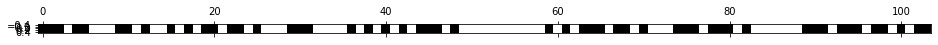

In [27]:
import matplotlib.pyplot as plt

### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

### 전체 특성을 사용한 점수, 선택된 특성을 사용한 점수

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_tr_selected, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성 사용 : 0.664
선택된 일부 특성 사용 : 0.758


### 모델 기반 특성 선택

* 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택
* 특성 선택에 사용하는 지도 학습 모델은 최종적으로 사용할 지도학습 모델과 같을 필요는 없음.
* 결정트리와 유사한 모델은 featureimportance 속성을 제공함.
* 선형 모델의 절대값으로 특성의 중요도를 재는데 사용
* 모델 기반의 특성 선택은 SelectFromModel에 구현되어 있음.

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [30]:
select = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42),
                         threshold="median")

* SelectFromModel은 지도학습 모델로 계산된 중요도가 임계치보다 큰 모든 특성을 선택
* 절반 가량의 특성이 선택될 수 있도록 중간값을 임계치로 사용.
* 트리 100개로 만든 랜덤 포레스트 분류기를 사용.

In [31]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

print("X_train.shape :" , X_train.shape)
print("X_train_l1.shape :", X_train_l1.shape)

X_train.shape : (253, 104)
X_train_l1.shape : (253, 52)


### 어떤 특성이 선택되었는지 확인

[False False False False False  True False False False False False  True
  True False  True  True False  True  True  True False False  True  True
 False  True False  True False False False False False False False False
 False False False False  True False  True  True  True False  True  True
  True False False False False False False False False False False False
 False False  True False  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True False False  True  True  True False  True
  True  True False  True  True False  True  True]


Text(0.5, 0, '특성 번호')

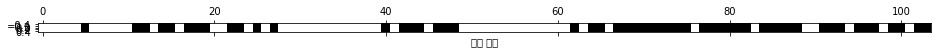

In [32]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [33]:
# 테스트 데이터 변환 
X_test_l1 = select.transform(X_test)

lr0 = LinearRegression()
lr0.fit(X_train_l1, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr0.score(X_test_l1, y_test)))

선택된 일부 특성 사용 : 0.770


In [34]:
# 테스트 데이터 변환 
# X_test_l1 = select.transform(X_test)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(rf.score(X_test, y_test)))

# score = LogisticRegression().fit(X_train, y_train).score(X_test_l1, y_test)

전체 특성 사용 : 0.795


### 반복적 특성 선택

* 일변량 모델은 모델을 사용하지 않음.(F값)
* 모델 기반 선택은 하나의 모델을 사용
* 반복적 특성 선택(iterative Feature Selection)에서는 특성의 수가 각기 다른 일련의 모델이 만들어짐.
    * 하나, 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건까지 하나씩 추가
    * 둘, 모든 특성을 가지고 시작하여 어떤 종료 조건이 될때까지 특성을 하나씩 제거.
* 이 모델들은 앞서 소개한 방법들보다 계산 비용이 훨씬 많이 든다.
* 재귀적 특성 제거(RFE:recursive feature elimination)가 하나의 방법

Text(0.5, 0, '특성 번호')

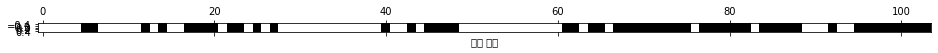

In [35]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestRegressor(n_estimators = 100, random_state = 42),
            n_features_to_select = 52)

select.fit(X_train, y_train)

# 선택된 특성을 표시합니다.
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("특성 번호")

* 일변량 분석이나 모델 기반 특성보다 특성 선택이 나아짐.
* 랜덤 포레스트 모델은 특성이 누락될때마다 다시 학습하므로 52번 실행.
* 이 코드를 실행하면 모델 기반 선택보다 훨씬 오래 걸림.

In [37]:
X_tr_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

lr1 = LinearRegression()
lr1.fit(X_tr_rfe, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr1.score(X_test_rfe, y_test)))

score = RandomForestRegressor().fit(X_tr_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수 : {:.3f}".format(score))

선택된 일부 특성 사용 : 0.799
테스트 점수 : 0.797
